In [ ]:
# ===========================
# Install Qiskit, Aer and pylatexenc
# ===========================
!pip install qiskit --quiet
!pip install qiskit-aer --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 96.0 MB/s eta 0:00:00


In [ ]:
# ==========================================
# HADAMARD GATE VISUALIZATION & ANALYSIS
# Compatible with Qiskit 2.x
# ==========================================

# -------------------------
# 1️⃣ Imports
# -------------------------
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_city, plot_histogram
from qiskit_aer import AerSimulator
import numpy as np

In [ ]:

# -------------------------
# 2️⃣ Helper Function
# -------------------------
def visualize_hadamard(init_state_vector, label):
    """
    Applies Hadamard to a single-qubit initial state and visualizes results.
    """
    # Build circuit for measurement
    qc = QuantumCircuit(1, 1)
    qc.initialize(init_state_vector, 0)
    qc.h(0)
    qc.measure(0, 0)

    # Statevector before measurement
    qc_state = QuantumCircuit(1)
    qc_state.initialize(init_state_vector, 0)
    qc_state.h(0)
    state_after = Statevector.from_instruction(qc_state)

    print(f"--- {label} ---")
    print("After Hadamard, statevector:", state_after.data)

    # Visualizations
    display(plot_bloch_multivector(state_after, title=f"Bloch Sphere: H on {label}"))
    display(plot_state_city(state_after, title=f"State City: H on {label}"))

    # Simulation with AerSimulator
    sim = AerSimulator()
    qc_t = transpile(qc, sim)
    result = sim.run(qc_t, shots=1024).result()
    counts = result.get_counts()
    display(plot_histogram(counts, title=f"Measurement Histogram: H on {label}"))
    print("\n")

--- |0> ---
After Hadamard, statevector: [0.70710678+0.j 0.70710678+0.j]


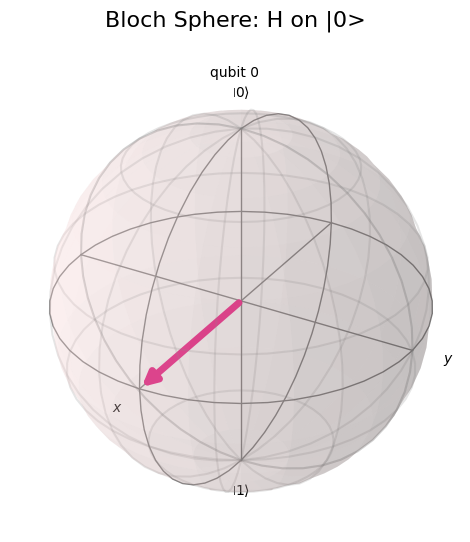

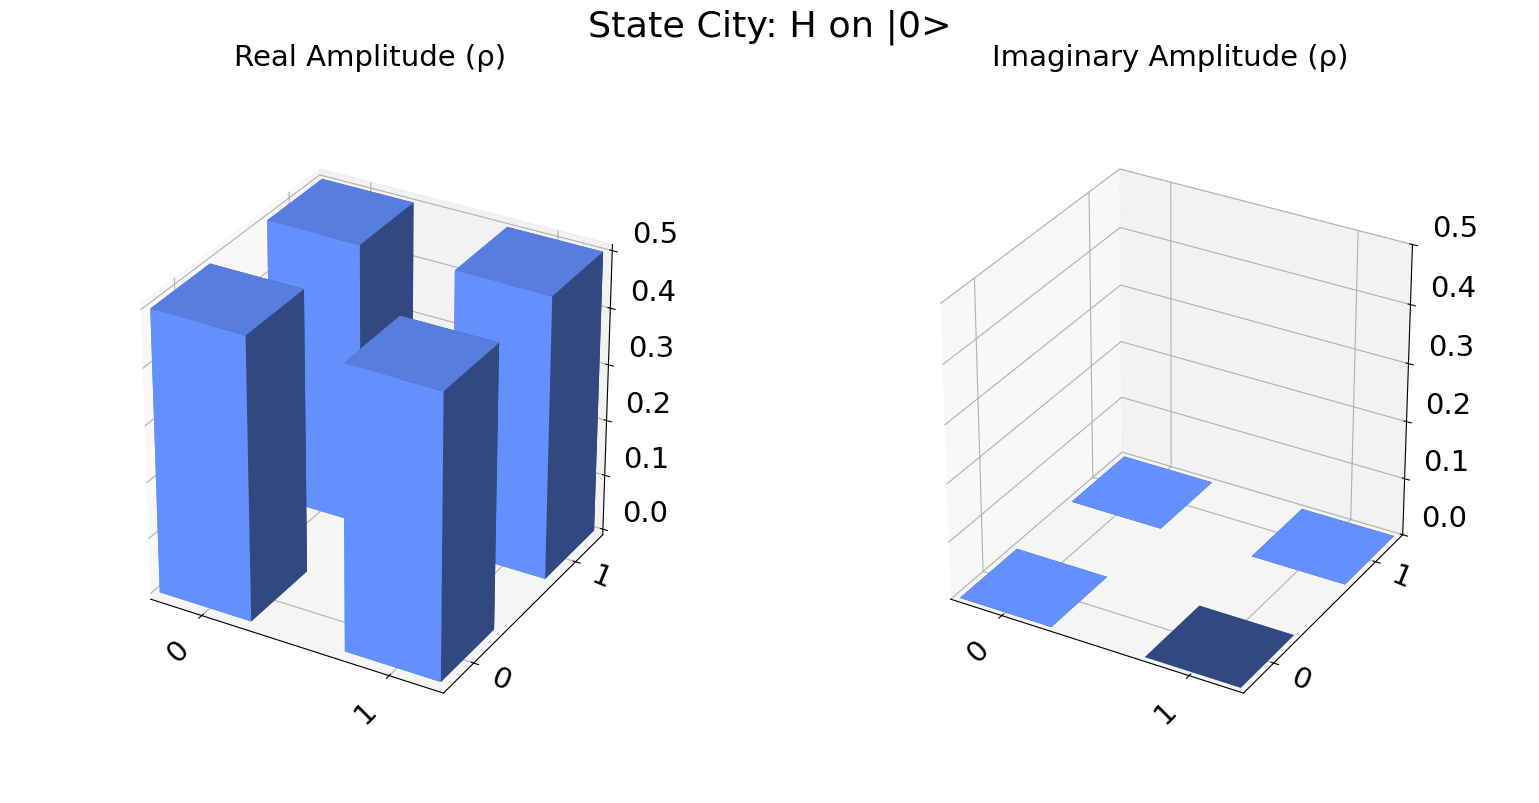

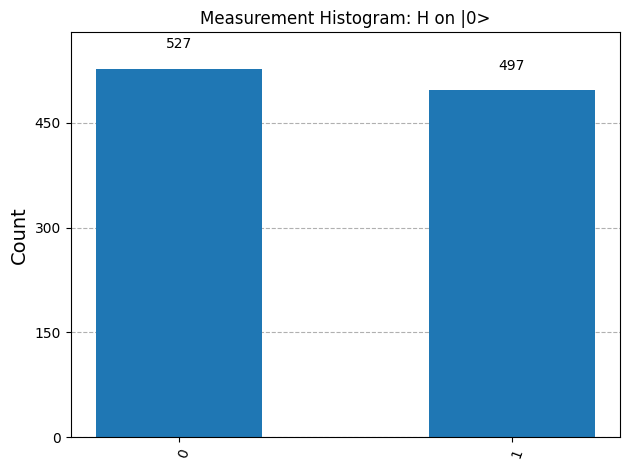



--- |1> ---
After Hadamard, statevector: [ 0.70710678+0.j -0.70710678+0.j]


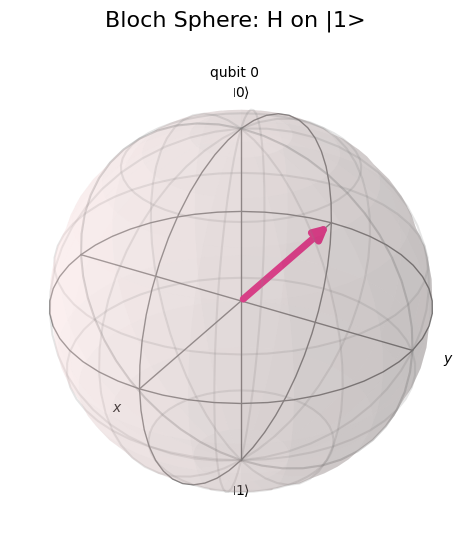

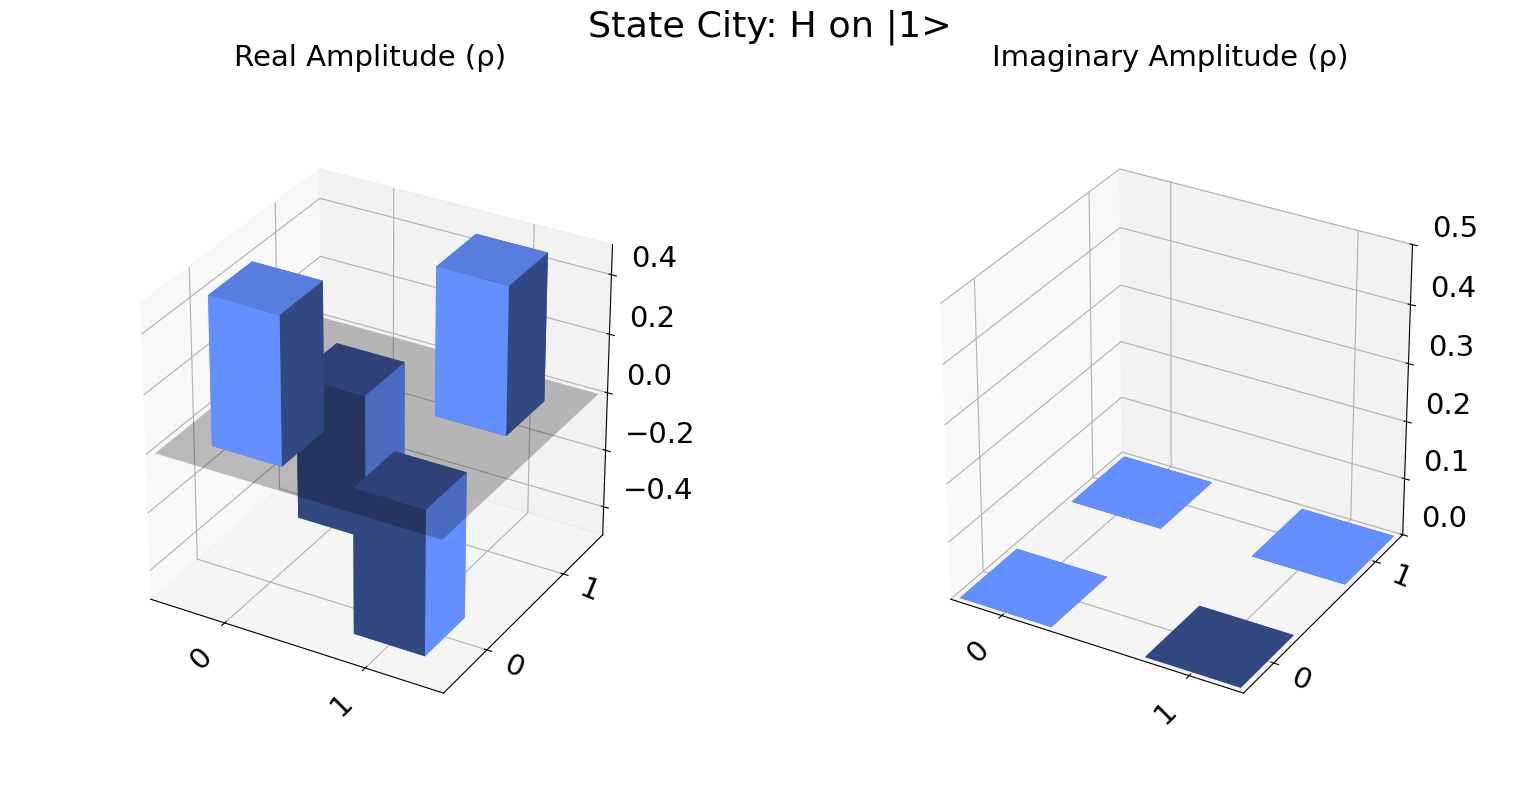

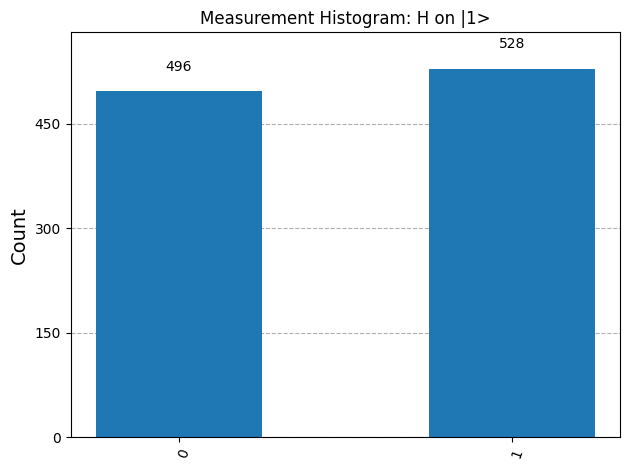



--- |+> ---
After Hadamard, statevector: [1.+0.j 0.+0.j]


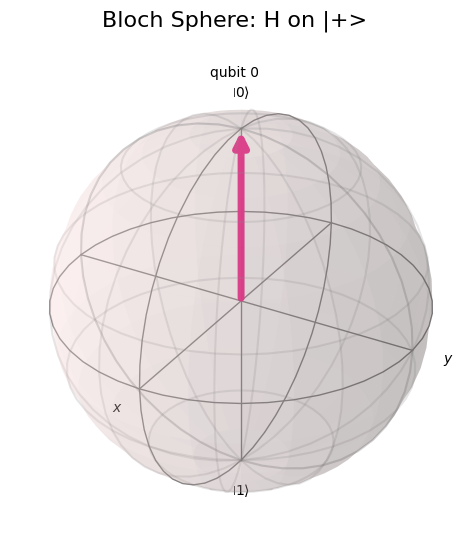

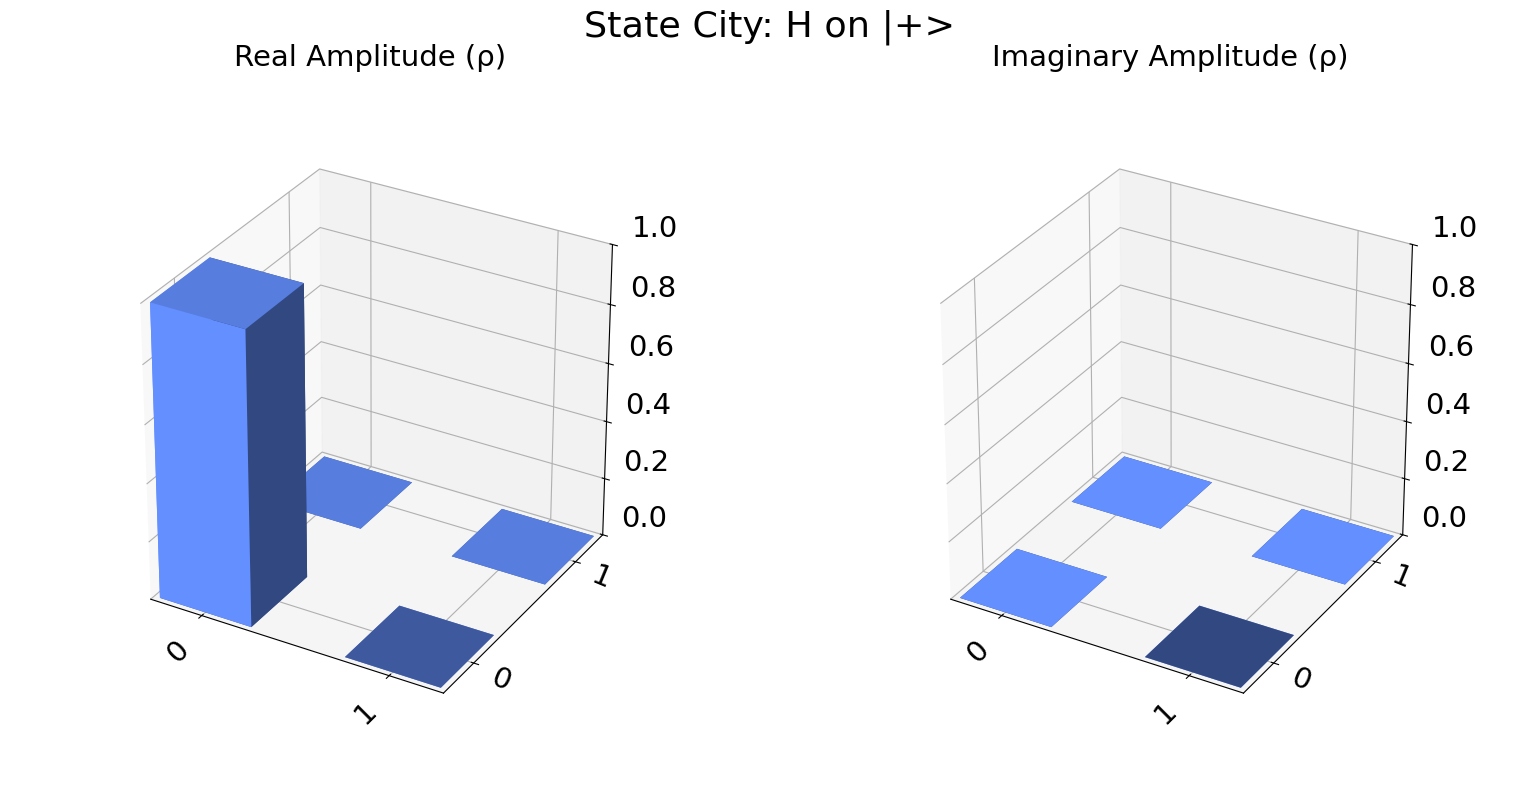

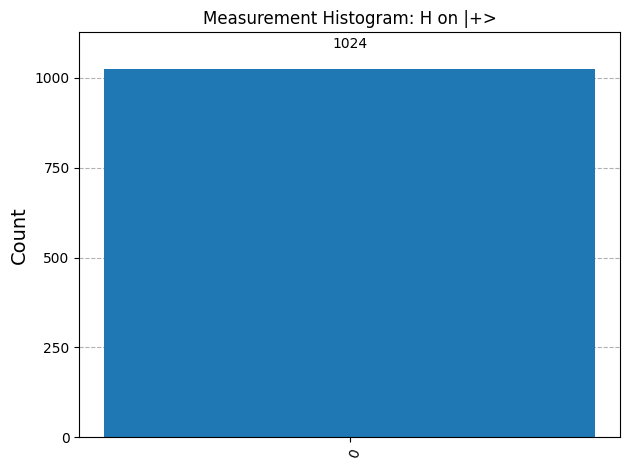



--- |-> ---
After Hadamard, statevector: [0.+0.j 1.+0.j]


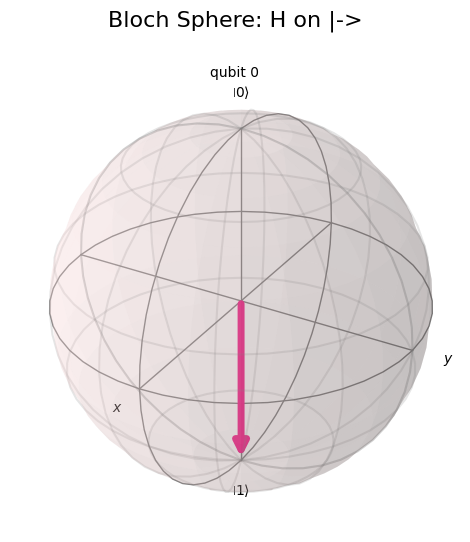

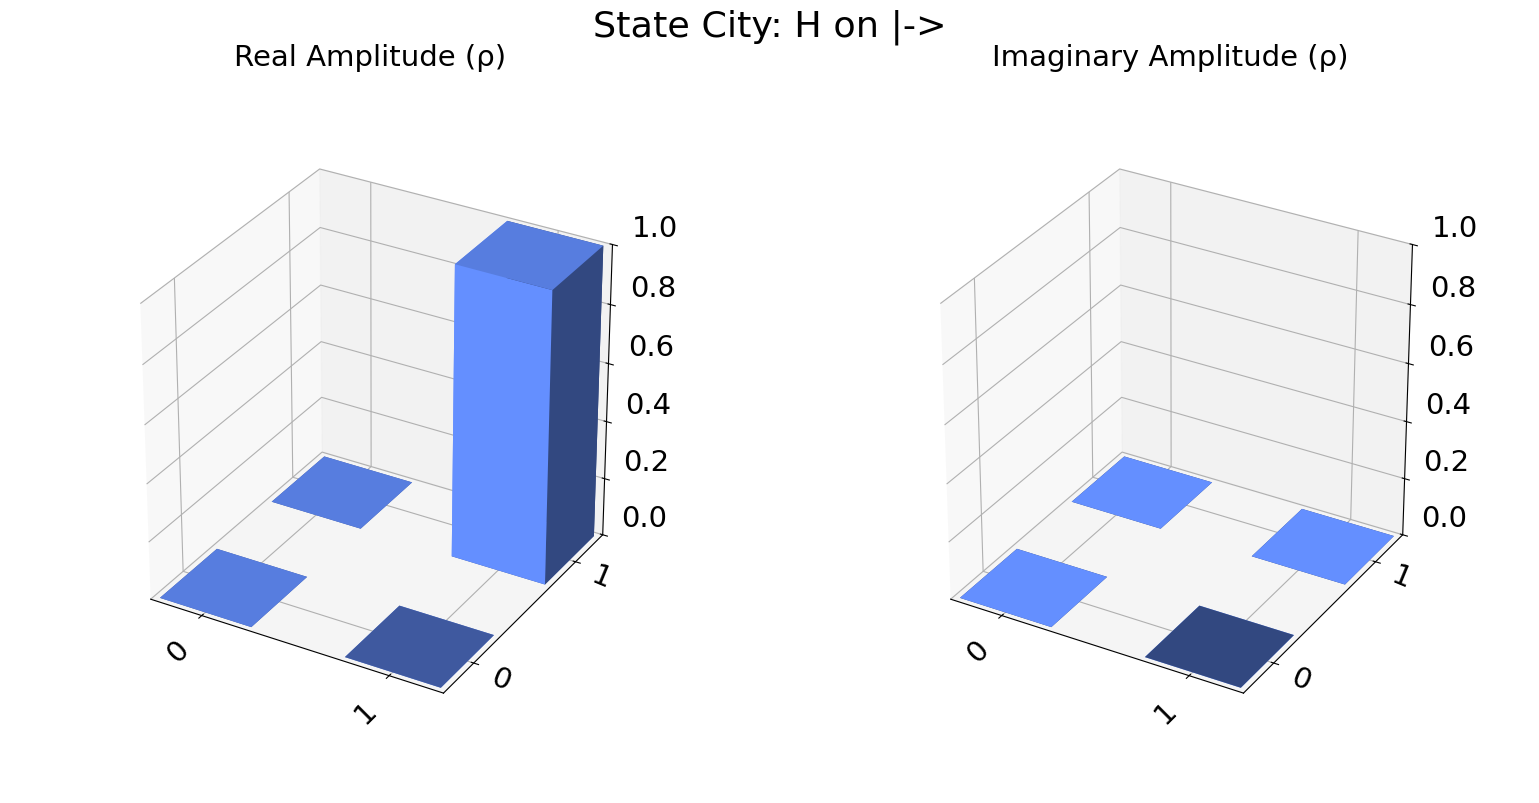

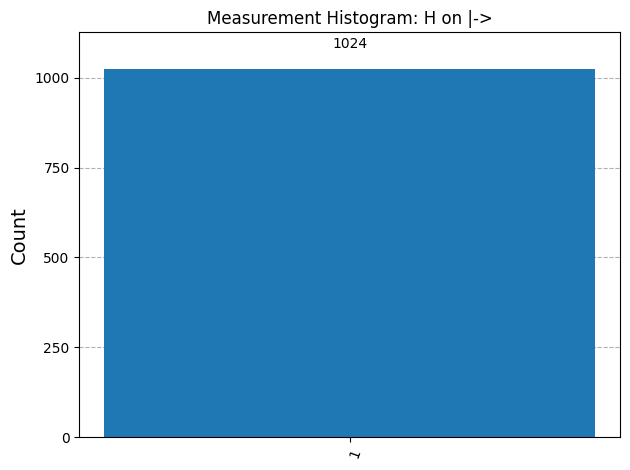

In [ ]:
# -------------------------
# 3️⃣ Single Qubit Examples
# -------------------------

# |0>
visualize_hadamard(np.array([1, 0]), "|0>")

# |1>
visualize_hadamard(np.array([0, 1]), "|1>")

# |+> = (|0> + |1>)/√2
visualize_hadamard(np.array([1/np.sqrt(2), 1/np.sqrt(2)]), "|+>")

# |-> = (|0> - |1>)/√2
visualize_hadamard(np.array([1/np.sqrt(2), -1/np.sqrt(2)]), "|->")


--- Two-Qubit H⊗H on |00> ---
Statevector: [0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


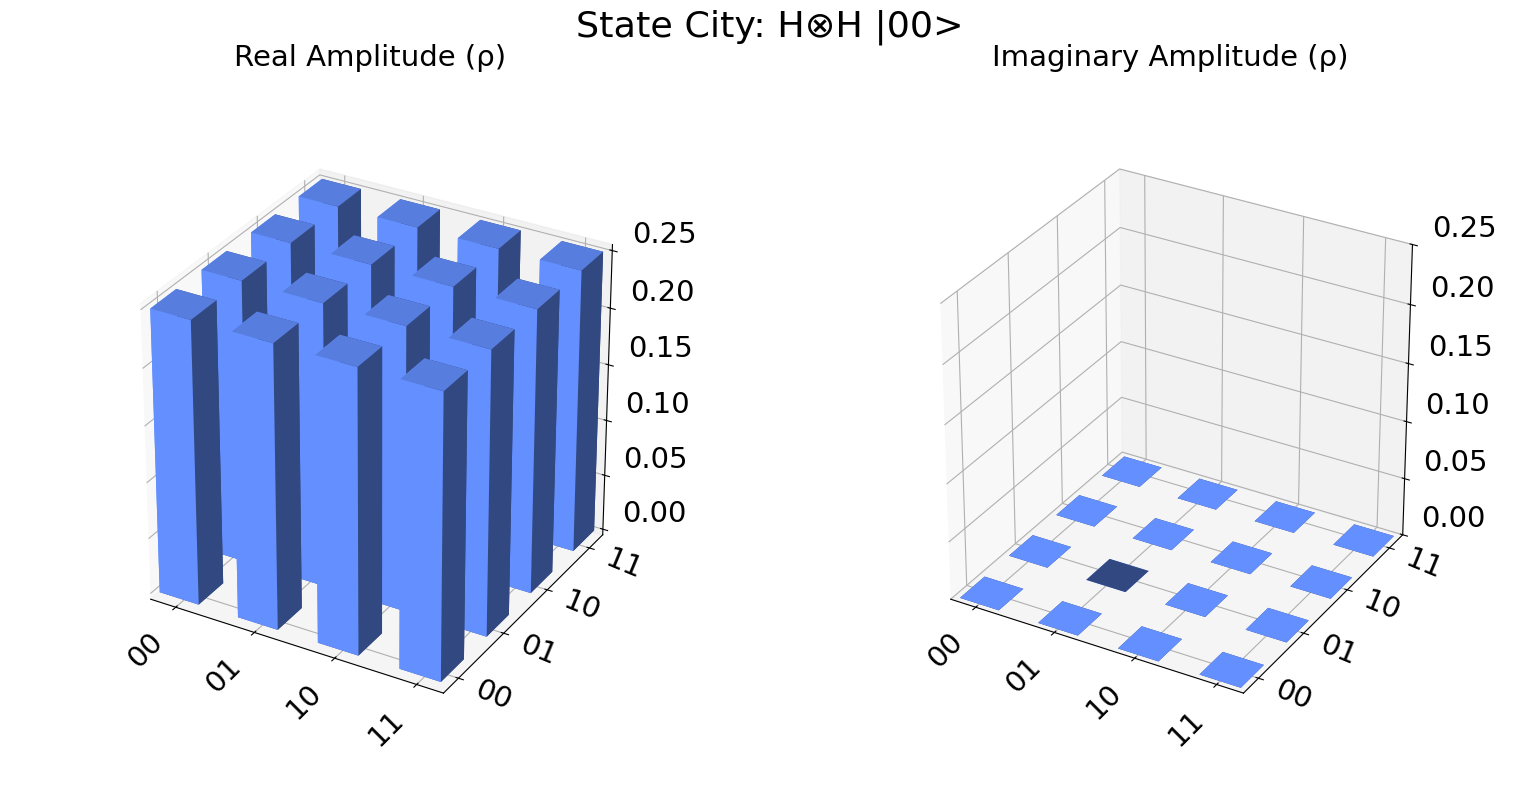

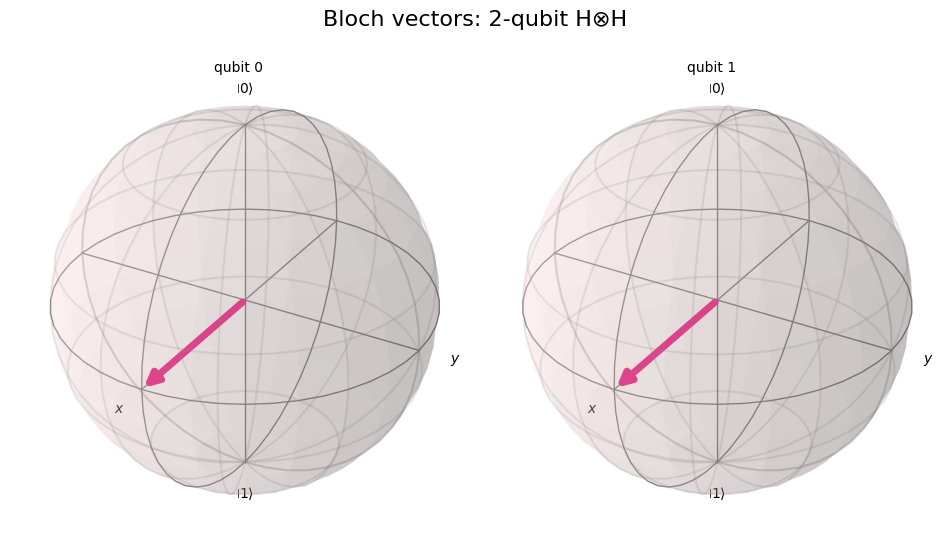

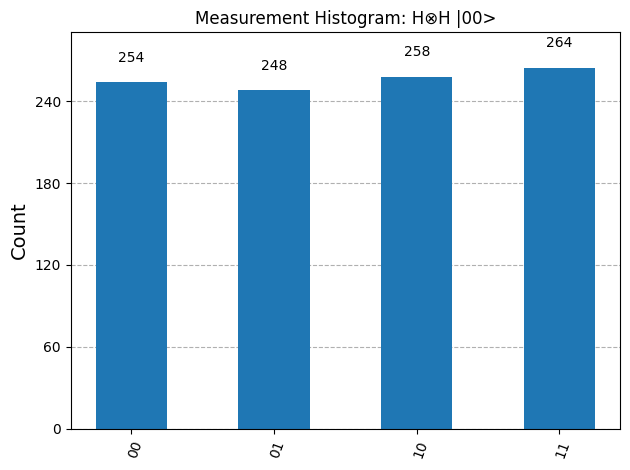


Analytical: equal probability for |00>, |01>, |10>, |11>.



In [ ]:

# -------------------------
# 4️⃣ Two Qubit System: H⊗H
# -------------------------
qc2 = QuantumCircuit(2, 2)
qc2.h([0, 1])
qc2.measure([0, 1], [0, 1])

# Statevector before measurement
qc2_state = QuantumCircuit(2)
qc2_state.h([0, 1])
state2 = Statevector.from_instruction(qc2_state)

print("--- Two-Qubit H⊗H on |00> ---")
print("Statevector:", state2.data)

display(plot_state_city(state2, title="State City: H⊗H |00>"))
display(plot_bloch_multivector(state2, title="Bloch vectors: 2-qubit H⊗H"))

# Simulation
sim = AerSimulator()
qc2_t = transpile(qc2, sim)
result2 = sim.run(qc2_t, shots=1024).result()
counts2 = result2.get_counts()
display(plot_histogram(counts2, title="Measurement Histogram: H⊗H |00>"))
print("\nAnalytical: equal probability for |00>, |01>, |10>, |11>.\n")


--- Bell State (|00> + |11>)/√2 ---
Statevector: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


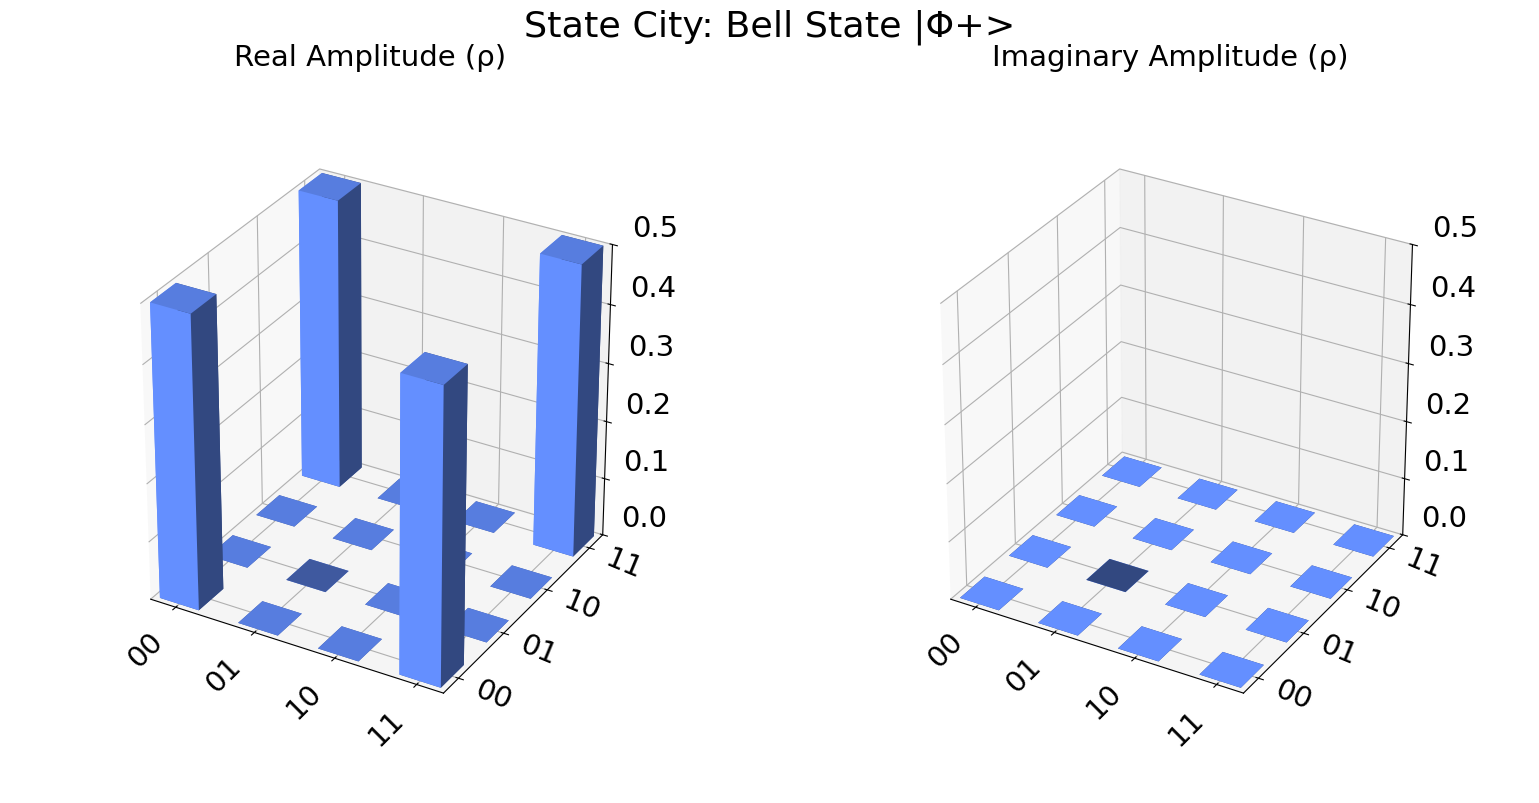

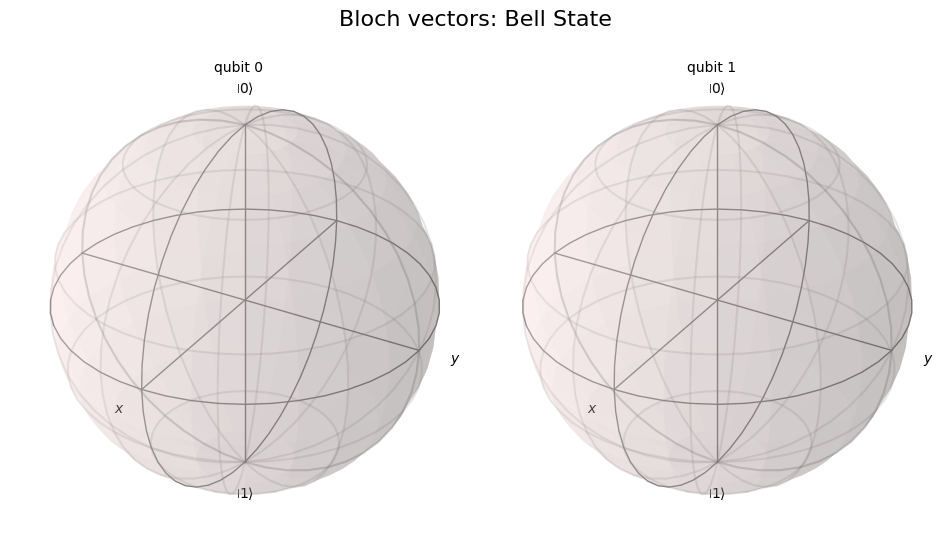

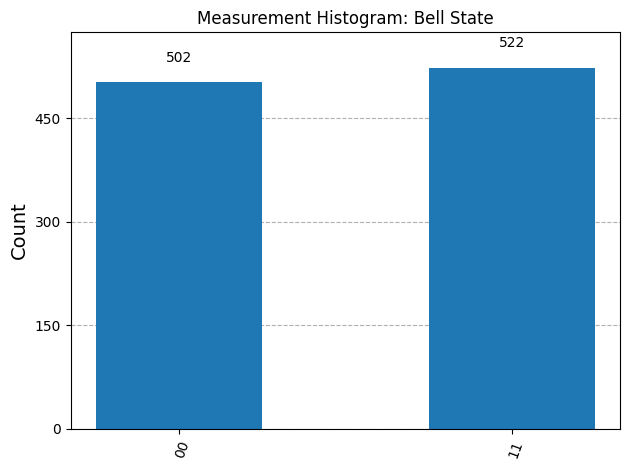


Analytical: outcomes |00> and |11> only, perfectly correlated.



In [ ]:
# -------------------------
# 5️⃣ Entangled State (Bell Pair): H + CNOT
# -------------------------
qc_ent = QuantumCircuit(2, 2)
qc_ent.h(0)    # Hadamard on first qubit
qc_ent.cx(0, 1)  # CNOT: entangle qubits
qc_ent.measure([0, 1], [0, 1])

# Statevector before measurement
qc_ent_state = QuantumCircuit(2)
qc_ent_state.h(0)
qc_ent_state.cx(0, 1)
state_ent = Statevector.from_instruction(qc_ent_state)

print("--- Bell State (|00> + |11>)/√2 ---")
print("Statevector:", state_ent.data)

display(plot_state_city(state_ent, title="State City: Bell State |Φ+>"))
display(plot_bloch_multivector(state_ent, title="Bloch vectors: Bell State"))

# Simulation
qc_ent_t = transpile(qc_ent, sim)
result_ent = sim.run(qc_ent_t, shots=1024).result()
counts_ent = result_ent.get_counts()
display(plot_histogram(counts_ent, title="Measurement Histogram: Bell State"))
print("\nAnalytical: outcomes |00> and |11> only, perfectly correlated.\n")


### Tasks

In [7]:
# Task 1: Predict the statevector after H on |0>, |1>, |+>, |->.

# |0> state
zero_state = np.array([1, 0])
qc_zero = QuantumCircuit(1)
qc_zero.initialize(zero_state, 0)
qc_zero.h(0)
state_zero_after_h = Statevector.from_instruction(qc_zero)
print("Statevector after H on |0>:", state_zero_after_h.data)

# |1> state
one_state = np.array([0, 1])
qc_one = QuantumCircuit(1)
qc_one.initialize(one_state, 0)
qc_one.h(0)
state_one_after_h = Statevector.from_instruction(qc_one)
print("Statevector after H on |1>:", state_one_after_h.data)

# |+> state
plus_state = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
qc_plus = QuantumCircuit(1)
qc_plus.initialize(plus_state, 0)
qc_plus.h(0)
state_plus_after_h = Statevector.from_instruction(qc_plus)
print("Statevector after H on |+>:", state_plus_after_h.data)

# |-> state
minus_state = np.array([1/np.sqrt(2), -1/np.sqrt(2)])
qc_minus = QuantumCircuit(1)
qc_minus.initialize(minus_state, 0)
qc_minus.h(0)
state_minus_after_h = Statevector.from_instruction(qc_minus)
print("Statevector after H on |->:", state_minus_after_h.data)

Statevector after H on |0>: [0.70710678+0.j 0.70710678+0.j]
Statevector after H on |1>: [ 0.70710678+0.j -0.70710678+0.j]
Statevector after H on |+>: [1.+0.j 0.+0.j]
Statevector after H on |->: [0.+0.j 1.+0.j]


--- Three-Qubit H⊗H⊗H on |000> ---
Statevector: [0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


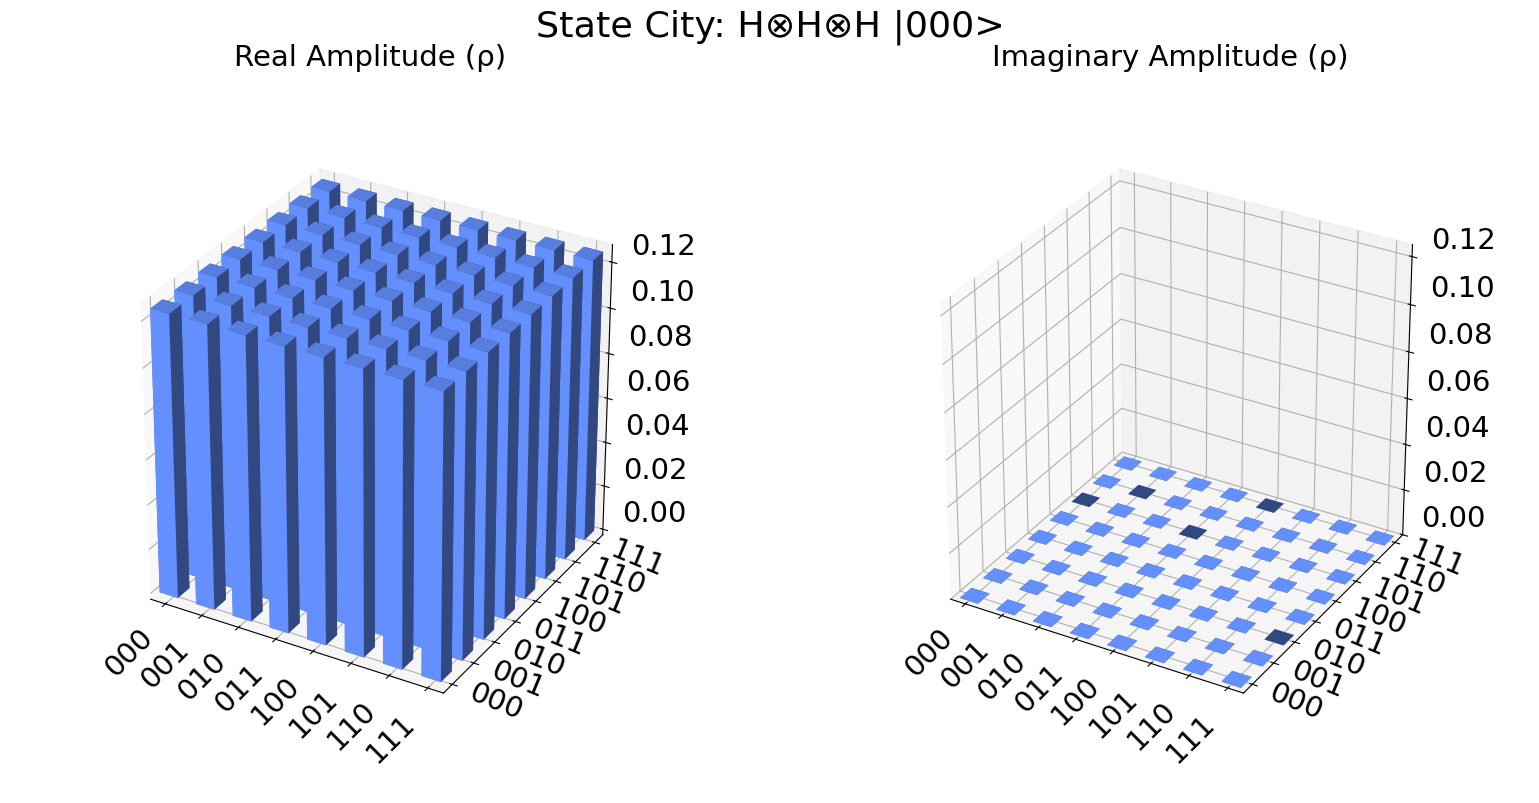

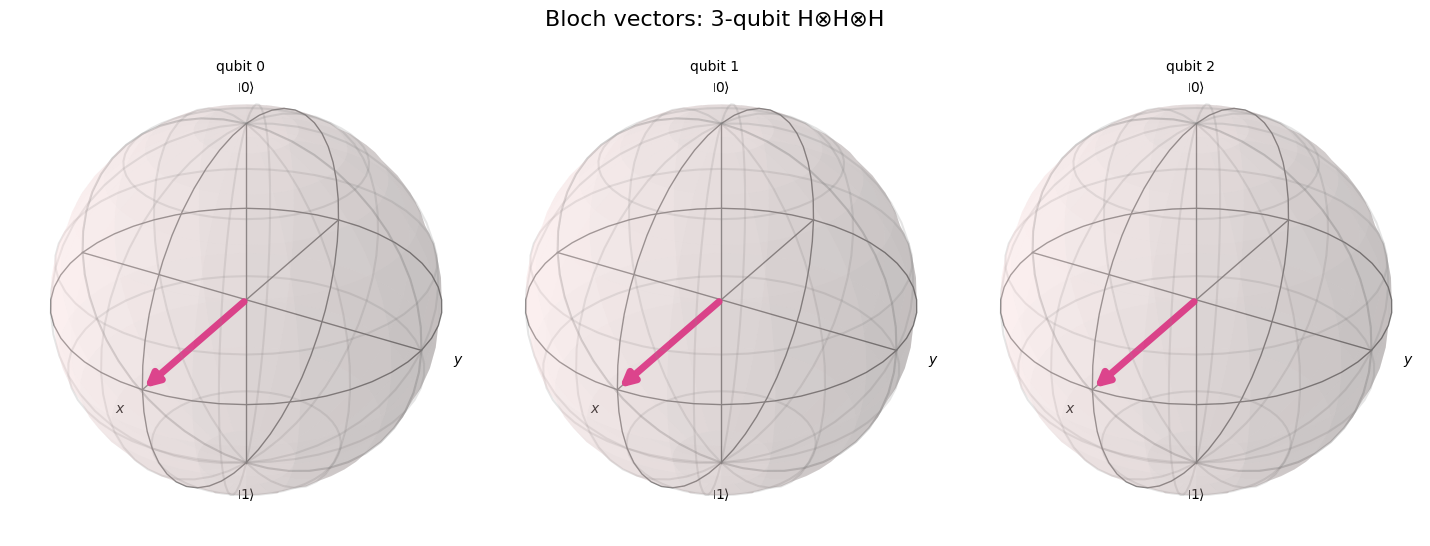

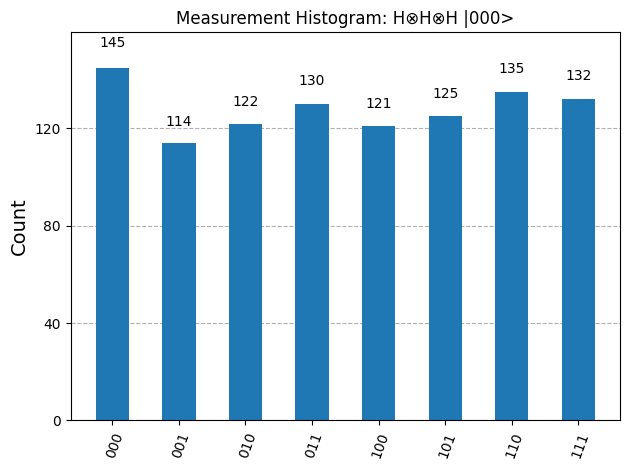


Analytical: equal probability for all 8 basis states.



In [8]:
# Task 2: Create a 3-qubit system with H⊗H⊗H and analyze measurement probabilities.

qc3 = QuantumCircuit(3, 3)
qc3.h([0, 1, 2])
qc3.measure([0, 1, 2], [0, 1, 2])

# Statevector before measurement
qc3_state = QuantumCircuit(3)
qc3_state.h([0, 1, 2])
state3 = Statevector.from_instruction(qc3_state)

print("--- Three-Qubit H⊗H⊗H on |000> ---")
print("Statevector:", state3.data)

display(plot_state_city(state3, title="State City: H⊗H⊗H |000>"))
display(plot_bloch_multivector(state3, title="Bloch vectors: 3-qubit H⊗H⊗H"))

# Simulation
sim = AerSimulator()
qc3_t = transpile(qc3, sim)
result3 = sim.run(qc3_t, shots=1024).result()
counts3 = result3.get_counts()
display(plot_histogram(counts3, title="Measurement Histogram: H⊗H⊗H |000>"))
print("\nAnalytical: equal probability for all 8 basis states.\n")

--- GHZ State (|000> + |111>)/√2 ---
Statevector: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


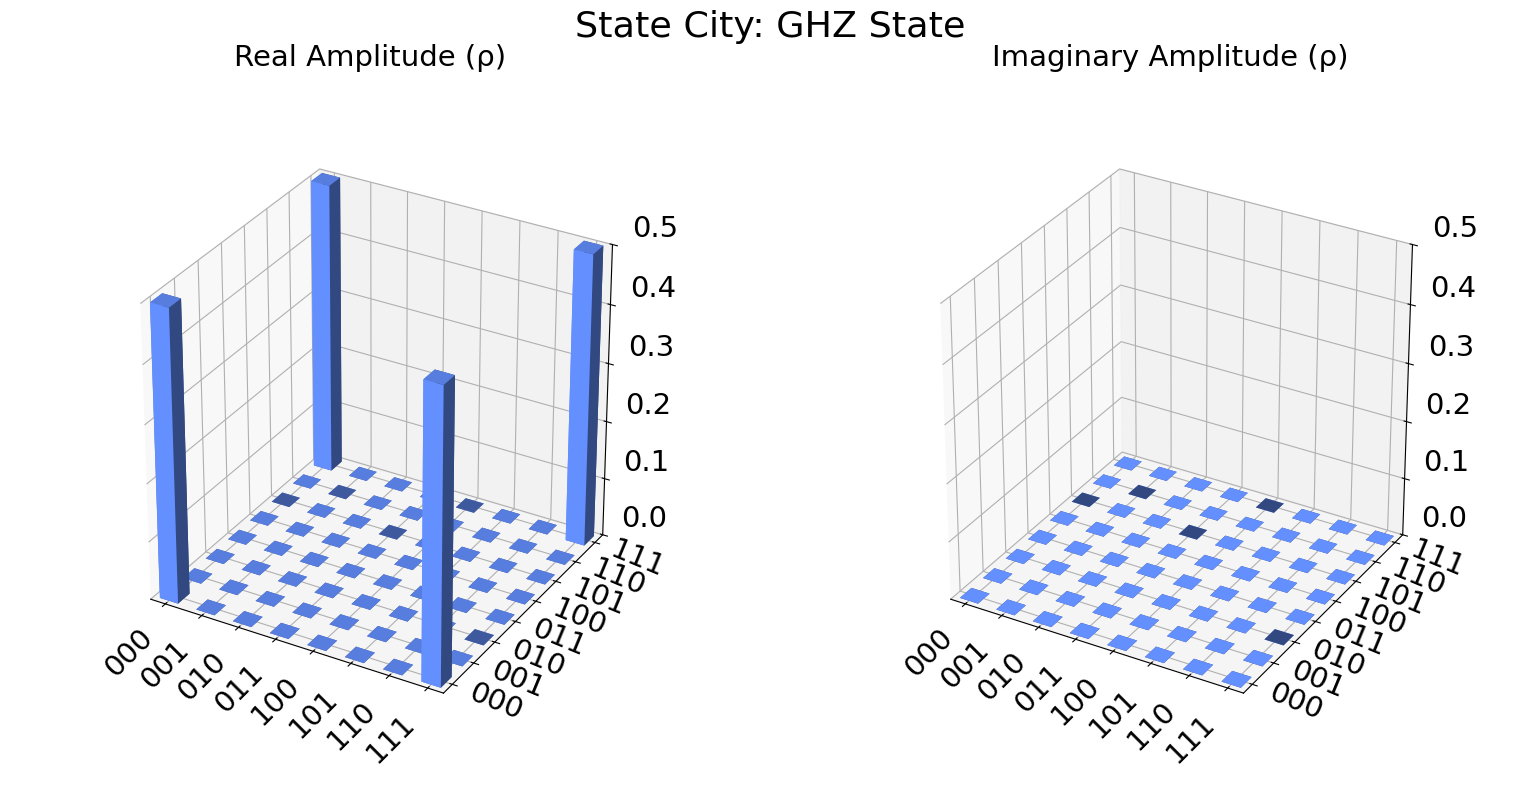

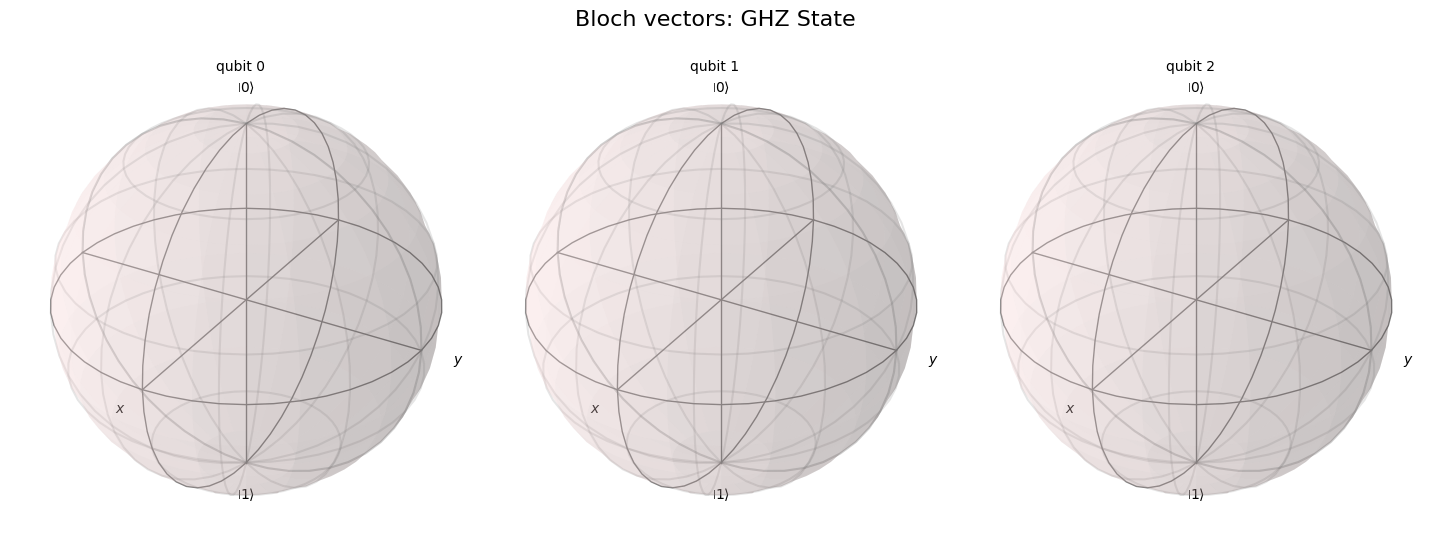

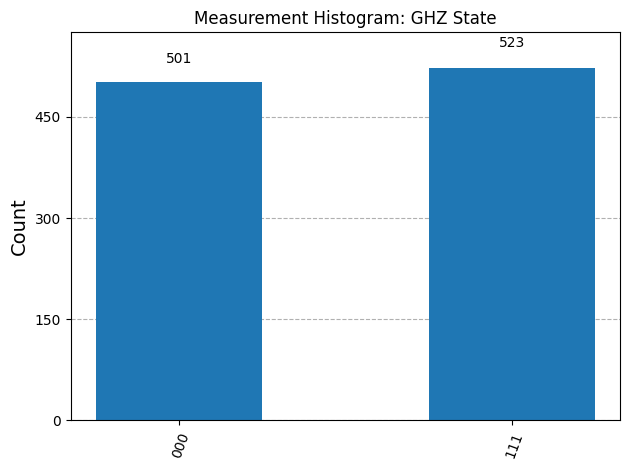


Analytical: outcomes |000> and |111> only.



In [9]:
# Task 3: Apply H + CX + CX on 3 qubits and analyze correlations.

qc_entangled3 = QuantumCircuit(3, 3)
qc_entangled3.h(0)    # Hadamard on the first qubit
qc_entangled3.cx(0, 1)  # CNOT between qubit 0 and 1
qc_entangled3.cx(0, 2)  # CNOT between qubit 0 and 2
qc_entangled3.measure([0, 1, 2], [0, 1, 2])

# Statevector before measurement
qc_entangled3_state = QuantumCircuit(3)
qc_entangled3_state.h(0)
qc_entangled3_state.cx(0, 1)
qc_entangled3_state.cx(0, 2)
state_entangled3 = Statevector.from_instruction(qc_entangled3_state)

print("--- GHZ State (|000> + |111>)/√2 ---")
print("Statevector:", state_entangled3.data)

display(plot_state_city(state_entangled3, title="State City: GHZ State"))
display(plot_bloch_multivector(state_entangled3, title="Bloch vectors: GHZ State"))

# Simulation
sim = AerSimulator()
qc_entangled3_t = transpile(qc_entangled3, sim)
result_entangled3 = sim.run(qc_entangled3_t, shots=1024).result()
counts_entangled3 = result_entangled3.get_counts()
display(plot_histogram(counts_entangled3, title="Measurement Histogram: GHZ State"))
print("\nAnalytical: outcomes |000> and |111> only.\n")

--- Apply H twice on |1> ---
Statevector after two Hadamards: [0.+0.j 1.+0.j]


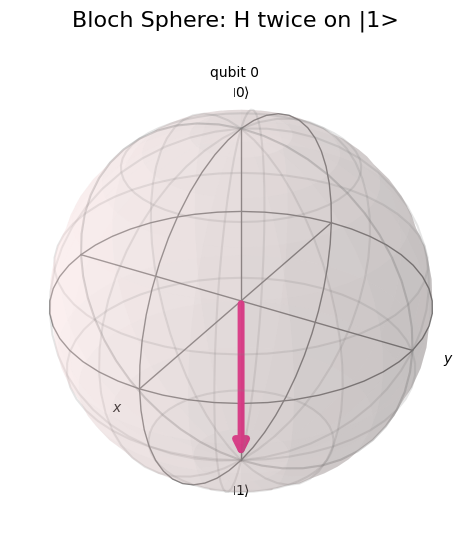

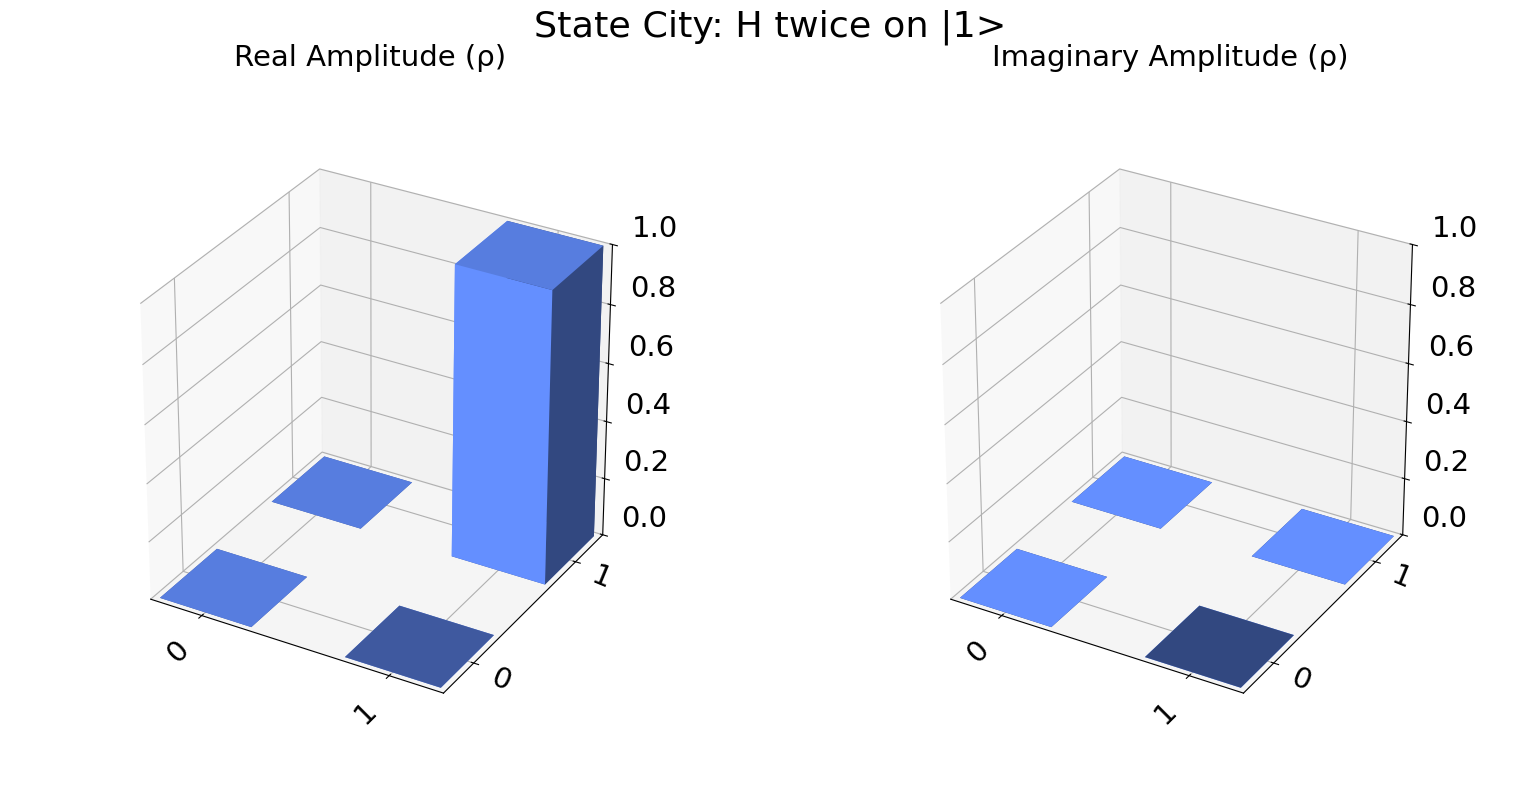

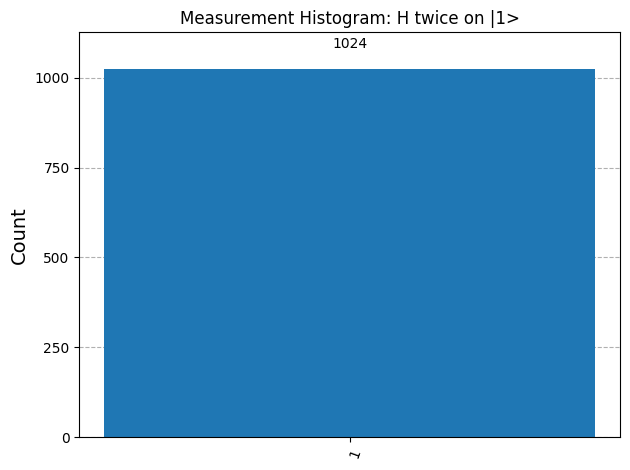


Analytical: should return to original |1> state.



In [10]:
# Task 4: Apply H twice on |1> and verify the original state.

qc_h_twice = QuantumCircuit(1, 1)
qc_h_twice.initialize([0, 1], 0) # Initialize to |1>
qc_h_twice.h(0)
qc_h_twice.h(0)
qc_h_twice.measure(0, 0)

# Statevector before measurement
qc_h_twice_state = QuantumCircuit(1)
qc_h_twice_state.initialize([0, 1], 0)
qc_h_twice_state.h(0)
qc_h_twice_state.h(0)
state_h_twice = Statevector.from_instruction(qc_h_twice_state)

print("--- Apply H twice on |1> ---")
print("Statevector after two Hadamards:", state_h_twice.data)

display(plot_bloch_multivector(state_h_twice, title="Bloch Sphere: H twice on |1>"))
display(plot_state_city(state_h_twice, title="State City: H twice on |1>"))

# Simulation
sim = AerSimulator()
qc_h_twice_t = transpile(qc_h_twice, sim)
result_h_twice = sim.run(qc_h_twice_t, shots=1024).result()
counts_h_twice = result_h_twice.get_counts()
display(plot_histogram(counts_h_twice, title="Measurement Histogram: H twice on |1>"))
print("\nAnalytical: should return to original |1> state.\n")

Bloch Sphere for H on |0>:


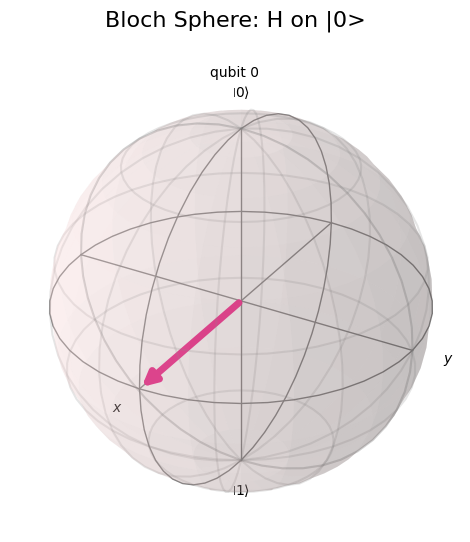

Bloch Sphere for H on |1>:


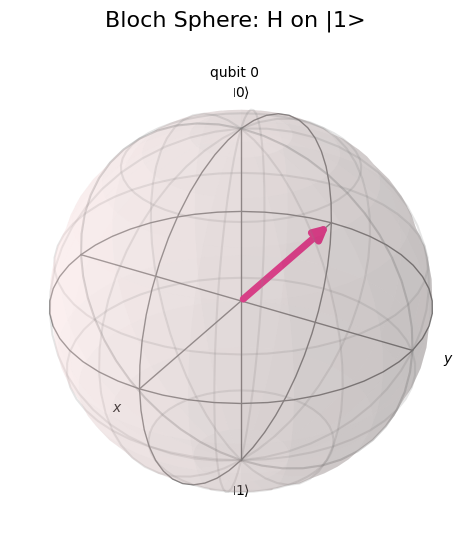

Bloch Sphere for H on |+>:


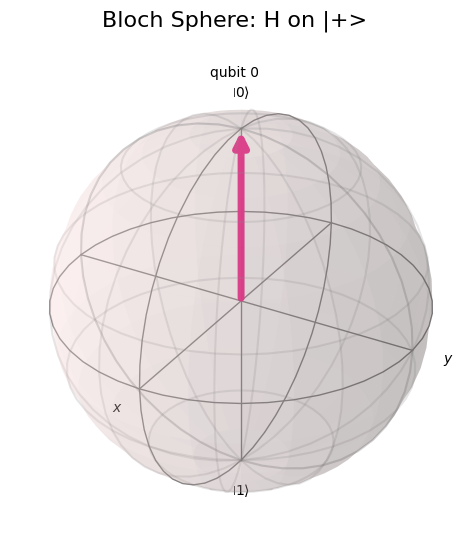

Bloch Sphere for H on |->:


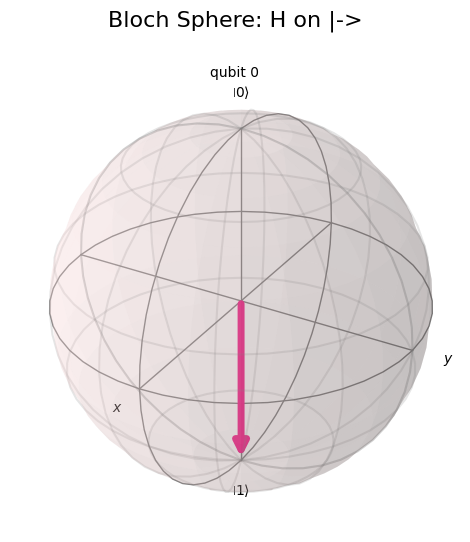

In [11]:
# Task 5: Use Bloch sphere plots to observe qubit rotations after Hadamard.

# |0> state
qc_bloch_0 = QuantumCircuit(1)
qc_bloch_0.initialize([1, 0], 0)
qc_bloch_0.h(0)
state_bloch_0 = Statevector.from_instruction(qc_bloch_0)
print("Bloch Sphere for H on |0>:")
display(plot_bloch_multivector(state_bloch_0, title="Bloch Sphere: H on |0>"))

# |1> state
qc_bloch_1 = QuantumCircuit(1)
qc_bloch_1.initialize([0, 1], 0)
qc_bloch_1.h(0)
state_bloch_1 = Statevector.from_instruction(qc_bloch_1)
print("Bloch Sphere for H on |1>:")
display(plot_bloch_multivector(state_bloch_1, title="Bloch Sphere: H on |1>"))

# |+> state
qc_bloch_plus = QuantumCircuit(1)
qc_bloch_plus.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 0)
qc_bloch_plus.h(0)
state_bloch_plus = Statevector.from_instruction(qc_bloch_plus)
print("Bloch Sphere for H on |+>:")
display(plot_bloch_multivector(state_bloch_plus, title="Bloch Sphere: H on |+>"))

# |-> state
qc_bloch_minus = QuantumCircuit(1)
qc_bloch_minus.initialize([1/np.sqrt(2), -1/np.sqrt(2)], 0)
qc_bloch_minus.h(0)
state_bloch_minus = Statevector.from_instruction(qc_bloch_minus)
print("Bloch Sphere for H on |->:")
display(plot_bloch_multivector(state_bloch_minus, title="Bloch Sphere: H on |->"))